<a href="https://colab.research.google.com/github/HarisudhanVL/Python-Projects/blob/main/Ticket%20Dispensation%20-%20II/MobileNetV2_video_capture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Required Libraries.**

In [1]:
import cv2
import imutils
import pathlib
import numpy as np
import tensorflow as tf
from base64 import b64decode
import matplotlib.pyplot as plt
from IPython.display import Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript

**Start webcam.**

In [2]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

**Click capture button to take photo.**

<IPython.core.display.Javascript object>

Saved to photo.jpg


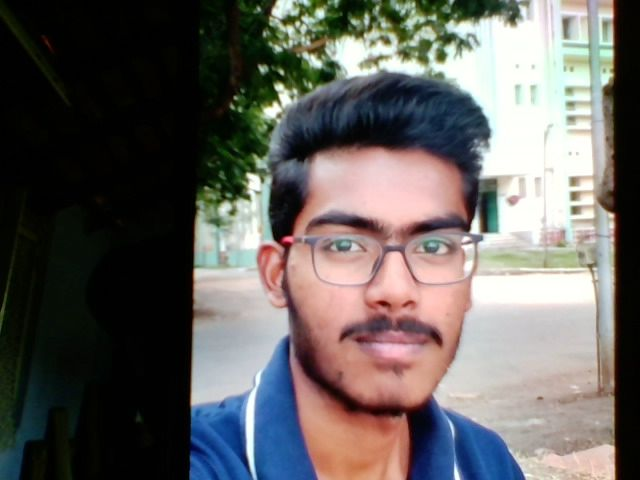

In [5]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**Read, resize and display image.**

400 300


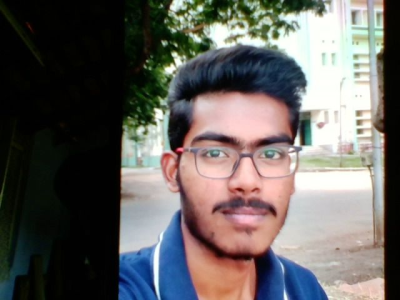

In [6]:
#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread(filename)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

**Caffe Deep Learning framework - Pre-trained model.**

In [ ]:
# !wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
# !wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2021-06-25 15:56:38--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.002s  

Last-modified header missing -- time-stamps turned off.
2021-06-25 15:56:38 (13.3 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2021-06-25 15:56:38--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

**Loading face detection pre-trained neural network model.**
OpenCV’s deep learning face detector is based on the Single Shot Detector (SSD) framework with a ResNet base network. The network is defined and trained using the Caffe Deep Learning framework

In [7]:
print("[INFO] loading model...")
prototxt = '/content/drive/MyDrive/Colab Notebooks/deploy.prototxt'
model = '/content/drive/MyDrive/Colab Notebooks/res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


In [8]:
# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

In [9]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


**Detecting face and drawing rectangle box around the face.**

In [10]:
for i in range(0, detections.shape[2]):

	# extract the confidence (i.e., probability) associated with the prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence threshold
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# draw the bounding box of the face along with the associated probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

**Detected face with accuracy percentage.**

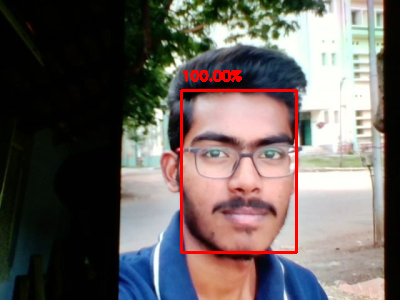

In [11]:
cv2_imshow(image)

**Detected face cropped from captured image.**

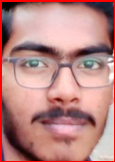

In [12]:
faces = image[startY:endY, startX:endX]
cv2_imshow(faces)

**Saving the image to drive.**

In [13]:
cv2.imwrite('/content/drive/MyDrive/data set/captured_image/img.jpg',faces)

True

**Loading the trained MobileNetV2 model.**

In [14]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/data set/model.h5')

**Prediction on captured image data.**                                 

Loading captured image.

In [15]:
def load_image(image_path):
    return tf.keras.preprocessing.image.load_img(image_path,target_size=(224,224))

In [16]:
def image_to_array(image):
    return tf.keras.preprocessing.image.img_to_array(image, dtype=np.int32)

In [17]:
def display_image(image_np):
    plt.figure()
    plt.imshow(image_np)

In [18]:
TEST_IMAGES_DIR_PATH = pathlib.Path('/content/drive/MyDrive/data set/captured_image')
TEST_IMAGE_PATHS = sorted(list(TEST_IMAGES_DIR_PATH.glob('*.jpg')))
TEST_IMAGE_PATHS

[PosixPath('/content/drive/MyDrive/data set/captured_image/img.jpg')]

**Test images.**

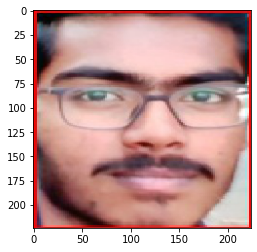

In [19]:
test_images = []
for image_path in TEST_IMAGE_PATHS:
    # <PIL.Image.Image image mode=RGB size=224x224 at 0x141247ED0>
    test_image = load_image(image_path)
    test_image_array = image_to_array(test_image)
    test_images.append(test_image_array)
    display_image(test_image_array)

**Test image - Preprocessing.**

In [20]:
def image_preprocess(image_array):
    return tf.keras.applications.mobilenet_v2.preprocess_input(
        image_array[tf.newaxis, ...]
    )

In [21]:
test_images_preprocessed = []
for test_image in test_images:
    test_image_preprocessed = image_preprocess(test_image)
    test_images_preprocessed.append(test_image_preprocessed)

In [22]:
print('Image shape before preprocessing:', test_images[0].shape)
print('Image shape after preprocessing:', test_images_preprocessed[0].shape)

Image shape before preprocessing: (224, 224, 3)
Image shape after preprocessing: (1, 224, 224, 3)


**Assigning tags to the image with percentage using probability**

In [23]:
def get_tags(probs, labels, max_classes = 5, prob_threshold = 0.01):
    probs_mask = probs > prob_threshold
    probs_filtered = probs[probs_mask] * 100
    labels_filtered = labels[probs_mask]
    
    sorted_index = np.flip(np.argsort(probs_filtered))
    labels_filtered = labels_filtered[sorted_index][:max_classes]
    probs_filtered = probs_filtered[sorted_index][:max_classes].astype(np.int)
    
    tags = ''
    for i in range(0, len(labels_filtered)):
        tags = tags + labels_filtered[i] + ' (' + str(probs_filtered[i]) + '%), ' 

    return tags, labels_filtered, probs_filtered 

In [24]:
label = ["0-3", "3-13", "13 and above"]
labels = np.array(label)

**classifying test images.**

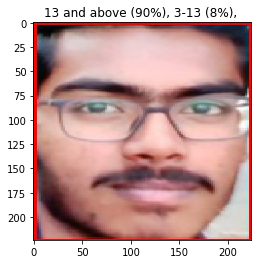

In [25]:
for image_index in range(0, len(test_images)):
    test_image = test_images[image_index]
    test_image_preprocessed = test_images_preprocessed[image_index]
    probabilities = new_model(test_image_preprocessed)
    tags, labels_filtered, probs_filtered = get_tags(probabilities.numpy()[0], labels)
    plt.figure()
    plt.title(tags)
    plt.imshow(test_image);

plt.show()